In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from wfdb import processing

In [ ]:
# Download only record '100' from MIT-BIH to local folder 'mitdb'
# wfdb.dl_database('mitdb', dl_dir='data/raw', records=['100'])

Generating record list for: 100
Generating list of all files for: 100
Created local base download directory: data/raw
Finished downloading files


In [5]:
# Load record and annotation from downloaded folder
record = wfdb.rdrecord('data/raw/100')
annotation = wfdb.rdann('data/raw/100', 'atr')


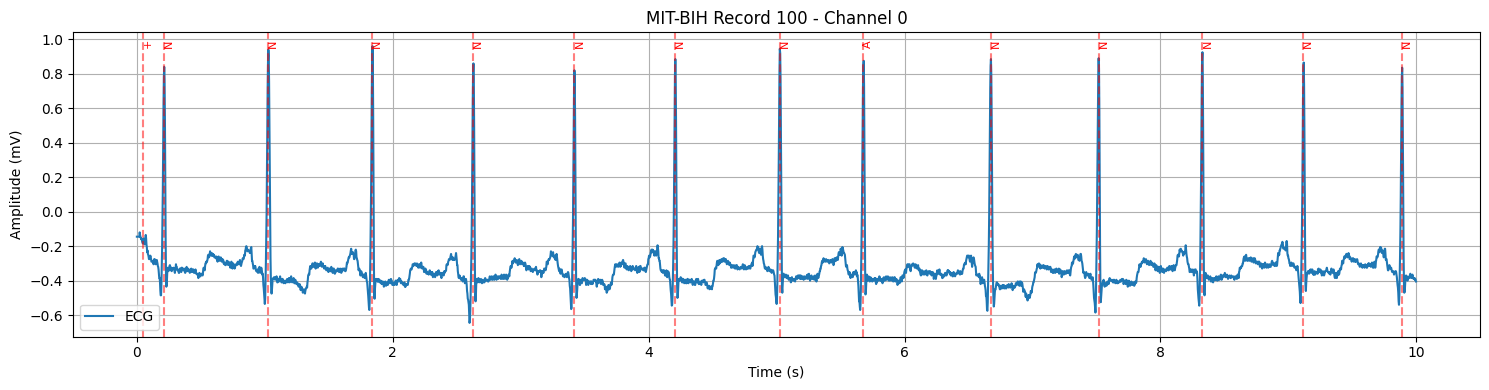

In [6]:
# Plot 10 seconds of ECG data with beat annotations
start = 0
end = 3600  # 10 seconds at 360Hz

signal = record.p_signal[start:end, 0]  # Channel 0
times = np.arange(start, end) / record.fs

plt.figure(figsize=(15, 4))
plt.plot(times, signal, label='ECG')
plt.title("MIT-BIH Record 100 - Channel 0")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")

# Overlay beat annotations
beat_times = annotation.sample / record.fs
beat_labels = annotation.symbol

for i, (bt, label) in enumerate(zip(beat_times, beat_labels)):
    if start / record.fs <= bt <= end / record.fs:
        plt.axvline(bt, color='red', linestyle='--', alpha=0.5)
        plt.text(bt, max(signal), label, rotation=90, color='red', fontsize=8)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
